In [1]:
import torch
from torchvision import datasets,transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_loader=torch.utils.data.DataLoader(datasets.MNIST('data',download=True,train=True,transform=transform),batch_size=64,shuffle=True)
test_loader=torch.utils.data.DataLoader(datasets.MNIST('data',download=True,train=False,transform=transform),batch_size=64,shuffle=False)

In [2]:
class MNIST_CNN(nn.Module):
  def __init__(self):
    super(MNIST_CNN,self).__init__()
    self.conv1=nn.Conv2d(1,8,3,padding=1)
    self.conv2=nn.Conv2d(8,16,3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(16*7*7,128)
    self.fc2=nn.Linear(128,10)
    self.dropout=nn.Dropout(0.25)

  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

model = MNIST_CNN()
print(model)


MNIST_CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
epochs = 5
train_losses, test_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate after each epoch
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total

    train_losses.append(running_loss / len(train_loader))
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/5], Loss: 0.3243, Accuracy: 97.36%
Epoch [2/5], Loss: 0.0972, Accuracy: 98.06%
Epoch [3/5], Loss: 0.0686, Accuracy: 98.06%
Epoch [4/5], Loss: 0.0576, Accuracy: 98.74%
Epoch [5/5], Loss: 0.0476, Accuracy: 98.97%


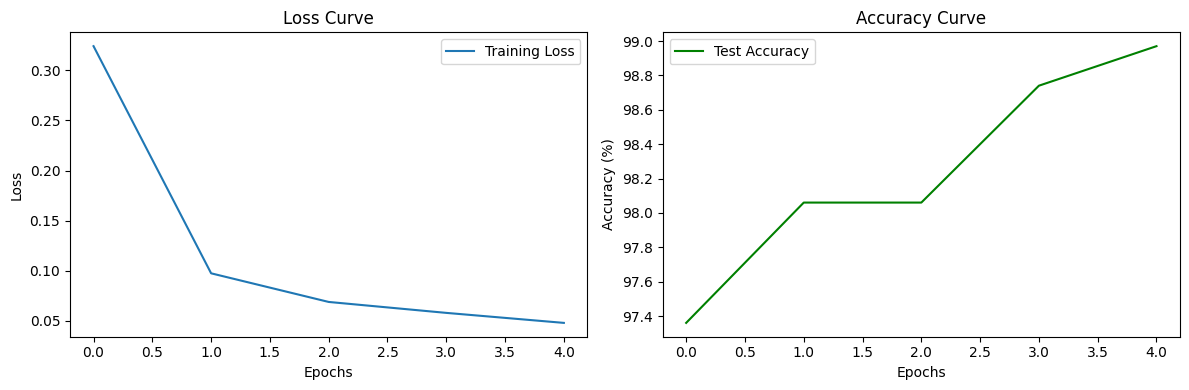

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

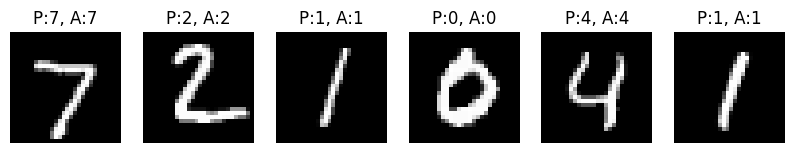

In [6]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 6, figsize=(10, 2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"P:{preds[i].item()}, A:{labels[i].item()}")
    axes[i].axis('off')
plt.show()

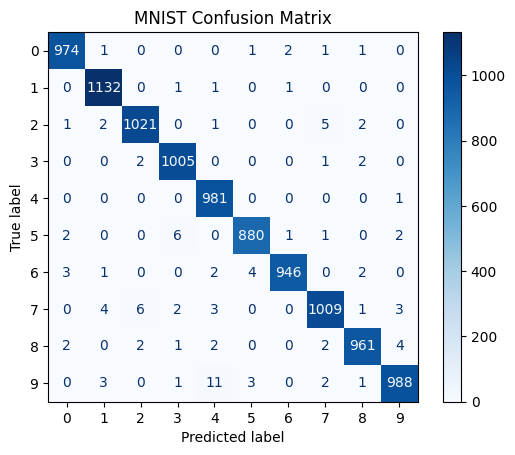

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("MNIST Confusion Matrix")
plt.show()

In [8]:
'''## Reflection
- Learned how to design a CNN for digit recognition using PyTorch.
- Understood the role of convolution, pooling, and fully connected layers.
- Visualized performance through accuracy/loss plots.
- Learned to save and reload models for deployment.
- Achieved >97% accuracy on MNIST dataset.
'''

'## Reflection\n- Learned how to design a CNN for digit recognition using PyTorch.\n- Understood the role of convolution, pooling, and fully connected layers.\n- Visualized performance through accuracy/loss plots.\n- Learned to save and reload models for deployment.\n- Achieved >97% accuracy on MNIST dataset.\n'